In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('out.csv',index_col=0)
df = df.rename(columns={'date_of_firstrev': 'Date'})
df.head(5)

,pttrn_type,sleeve_type,image_id,style,color,neckline,sleeve_length,season,material,fabric,sheer,fit_type,placket_type,price,avg_rating,no_of_reviews,Date
1457,Striped,NaN,1458,Basics,Blue,Collar,Long Sleeve,Spring/Fall,NaN,NaN,NaN,Regular Fit,NaN,"\r\n ₹1,146\r\n",4.7,2202,2015-11-30
1882,Geometric,NaN,1883,Boho,Multicolor,Round Neck,Short Sleeve,Summer,NaN,NaN,NaN,Regular Fit,NaN,"\r\n ₹1,510\r\n",4.8,2473,2015-4-16
1566,Colorblock,NaN,1567,Casual,Black,Boat Neck,Long Sleeve,Spring/Fall,NaN,High Stretch,NaN,Regular Fit,NaN,\r\n ₹707\r\n,4.6,1248,2015-8-21
234,Plain,NaN,235,Sexy,Black,Off the Shoulder,Long Sleeve,Spring/Fall,NaN,High Stretch,NaN,Slim Fit,Pullovers,\r\n ₹668\r\n,4.9,741,2016-10-12
1138,Polka Dot,Batwing Sleeve,1139,Casual,Black and White,Boat Neck,Long Sleeve,Spring/Fall,NaN,Non-stretch,NaN,Oversized,Pullovers,"\r\n ₹1,337\r\n",4.8,1668,2016-3-22


In [73]:
casual_df = df[df['style']=='Casual']

In [74]:
casual_df = casual_df[['style', 'avg_rating', 'no_of_reviews', 'Date']]

In [75]:
casual_df = casual_df[casual_df['Date']>='2018-0-0']

# Now we must cluster all dates month wise, i.e., All days from 2018-01-01 to 2018-01-31 must equal 2018-01
from math import ceil
def format_date(date):
    date = date.split('-')
    date[2] = '01'
    return '-'.join(date)
casual_df['Date'] = [format_date(date) for date in casual_df['Date']]

In [76]:
casual_df.head()

,style,avg_rating,no_of_reviews,Date
2102,Casual,5.0,0,2018-1-01
168,Casual,4.7,1357,2018-1-01
1384,Casual,4.7,3665,2018-1-01
2017,Casual,4.8,1229,2018-10-01
285,Casual,4.4,1551,2018-10-01


In [77]:
casual_df['Trend'] = casual_df.apply(lambda row: (int(row.avg_rating)**4)*((int(row.no_of_reviews)+1)**0.5), axis = 1)
casual_df.head()

,style,avg_rating,no_of_reviews,Date,Trend
2102,Casual,5.0,0,2018-1-01,625.000000
168,Casual,4.7,1357,2018-1-01,9433.869196
1384,Casual,4.7,3665,2018-1-01,15500.160515
2017,Casual,4.8,1229,2018-10-01,8978.267093
285,Casual,4.4,1551,2018-10-01,10085.230389


In [78]:
casual_df = casual_df.drop(columns = ['no_of_reviews', 'avg_rating'])

In [79]:
casual_df.head()

,style,Date,Trend
2102,Casual,2018-1-01,625.000000
168,Casual,2018-1-01,9433.869196
1384,Casual,2018-1-01,15500.160515
2017,Casual,2018-10-01,8978.267093
285,Casual,2018-10-01,10085.230389


In [80]:
casual_df = (casual_df.groupby('Date', as_index=False)
        .agg({'Trend':'mean'}))

casual_df['Date'] =pd.to_datetime(casual_df.Date, format="%Y/%m/%d")
casual_df = casual_df.sort_values(by='Date')
casual_df.drop(casual_df.tail(3).index,inplace=True)
casual_df.set_index('Date', inplace=True)

In [81]:
casual_df = casual_df.reset_index()

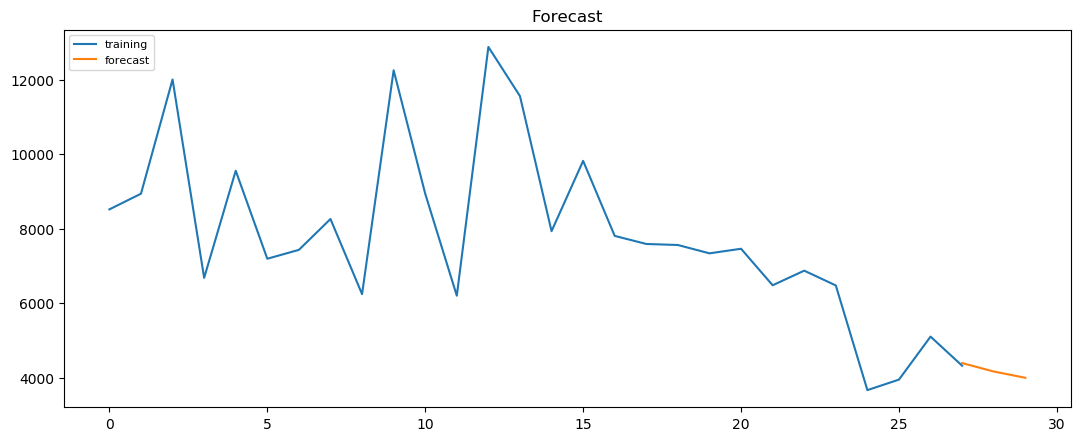

In [82]:
from statsmodels.tsa.arima_model import ARIMA

train = casual_df.Trend

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(3, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, [27,28,29])

# Plot
plt.figure(figsize=(13,5), dpi=100)
plt.plot(train, label='training')
plt.plot(fc_series, label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [84]:
print(list(train), list(fc_series))

[8519.676570304766, 8940.518083425426, 12008.099134664104, 6680.777429992491, 9557.524096877583, 7194.4027229347685, 7432.4095119039075, 8261.164361651896, 6243.840300805245, 12255.105197335506, 8939.730086998603, 6201.499974917246, 12881.659520418943, 11560.594621773802, 7934.490681684713, 9822.217938036289, 7807.439590719326, 7590.792160617553, 7563.083914241256, 7339.123069957727, 7462.282672877795, 6482.1059317874215, 6874.066874343267, 6477.393238459705, 3666.3403963707874, 3948.6008491234043, 5103.142113634739, 4321.420146285361] [4392.579703740797, 4166.261880522439, 3997.46601183977]


In [85]:
boho_df = df[df['style']=='Boho']

In [86]:
boho_df = boho_df[['style', 'avg_rating', 'no_of_reviews', 'Date']]

In [87]:
boho_df = boho_df[boho_df['Date']>='2018-0-0']

# Now we must cluster all dates month wise, i.e., All days from 2018-01-01 to 2018-01-31 must equal 2018-01
from math import ceil
def format_date(date):
    date = date.split('-')
    date[2] = '01'
    return '-'.join(date)
boho_df['Date'] = [format_date(date) for date in boho_df['Date']]

In [88]:
boho_df['Trend'] = boho_df.apply(lambda row: (int(row.avg_rating)**4)*((int(row.no_of_reviews)+1)**0.5), axis = 1)
boho_df.head()

,style,avg_rating,no_of_reviews,Date,Trend
1526,Boho,4.7,63,2018-1-01,2048.000000
656,Boho,4.7,757,2018-10-01,7048.140748
1763,Boho,4.8,1986,2018-11-01,11411.399213
1084,Boho,4.8,2484,2018-11-01,12761.542227
690,Boho,4.8,1769,2018-11-01,10770.270192


In [89]:
boho_df = boho_df.drop(columns = ['no_of_reviews', 'avg_rating'])
boho_df = (boho_df.groupby('Date', as_index=False)
        .agg({'Trend':'mean'}))

boho_df['Date'] =pd.to_datetime(boho_df.Date, format="%Y/%m/%d")
boho_df = boho_df.sort_values(by='Date')
boho_df.drop(boho_df.tail(3).index,inplace=True)
boho_df.set_index('Date', inplace=True)
idx = pd.date_range(start = '2018-01-01', end = '2020-04-01', freq = 'MS')
boho_df = boho_df.reindex(idx, fill_value='NaN')
boho_df = boho_df.astype(float)
boho_df = boho_df.interpolate(method='linear', axis=0).ffill().bfill()
boho_df = boho_df.reset_index()

C:\Users\ARCHIT\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\ARCHIT\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\ARCHIT\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an a

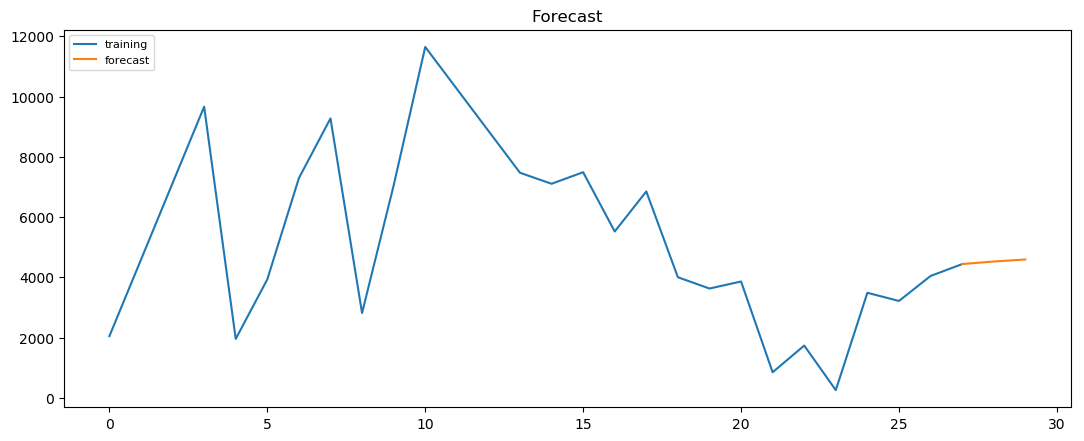

In [90]:
train = boho_df.Trend

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 0))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(3, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, [27,28,29])

# Plot
plt.figure(figsize=(13,5), dpi=100)
plt.plot(train, label='training')
plt.plot(fc_series, label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [91]:
print(list(train), list(fc_series))

[2048.0, 4586.438448679122, 7124.876897358245, 9663.315346037367, 1956.2056777069697, 3932.746622908727, 7292.4291706978665, 9275.247653166265, 2816.0, 7048.140747743337, 11647.737210404579, 10255.586263751376, 8863.435317098174, 7471.284370444971, 7105.468833658678, 7489.185518209142, 5522.041792954394, 6850.433397405331, 4002.9500352305004, 3628.3231645725004, 3861.2612233625614, 849.0559463309824, 1734.573611342817, 256.0, 3487.12868517596, 3215.505145610656, 4044.78345501985, 4439.434796907557] [4440.264442195703, 4525.263320285832, 4592.273195201061]


In [92]:
sexy_df = df[df['style']=='Sexy']
sexy_df = sexy_df[['style', 'avg_rating', 'no_of_reviews', 'Date']]
sexy_df.head()

,style,avg_rating,no_of_reviews,Date
234,Sexy,4.9,741,2016-10-12
1303,Sexy,4.9,4132,2016-8-15
414,Sexy,4.8,8859,2017-10-5
667,Sexy,5.0,0,2017-4-19
1243,Sexy,4.8,1794,2017-5-26


In [93]:
sexy_df = sexy_df[sexy_df['Date']>='2018-0-0']

# Now we must cluster all dates month wise, i.e., All days from 2018-01-01 to 2018-01-31 must equal 2018-01
from math import ceil
def format_date(date):
    date = date.split('-')
    date[2] = '01'
    return '-'.join(date)
sexy_df['Date'] = [format_date(date) for date in sexy_df['Date']]

In [94]:
sexy_df['Trend'] = sexy_df.apply(lambda row: (int(row.avg_rating)**4)*((int(row.no_of_reviews)+1)**0.5), axis = 1)
sexy_df.head()

,style,avg_rating,no_of_reviews,Date,Trend
579,Sexy,4.8,653,2018-10-01,6546.796469
2080,Sexy,4.5,44,2018-10-01,1717.300207
1344,Sexy,4.9,2330,2018-11-01,12359.790289
825,Sexy,4.8,9063,2018-12-01,24372.490722
614,Sexy,4.8,3804,2018-2-01,15791.278606


In [95]:
sexy_df = sexy_df.drop(columns = ['no_of_reviews', 'avg_rating'])
sexy_df = (sexy_df.groupby('Date', as_index=False)
        .agg({'Trend':'mean'}))

sexy_df['Date'] =pd.to_datetime(sexy_df.Date, format="%Y/%m/%d")
sexy_df = sexy_df.sort_values(by='Date')
sexy_df.drop(sexy_df.tail(3).index,inplace=True)
sexy_df.set_index('Date', inplace=True)
idx = pd.date_range(start = '2018-01-01', end = '2020-04-01', freq = 'MS')
sexy_df = sexy_df.reindex(idx, fill_value='NaN')
sexy_df = sexy_df.astype(float)
sexy_df = sexy_df.interpolate(method='quadratic', axis=0).ffill().bfill()
sexy_df = sexy_df.reset_index()

In [96]:
sexy_df.head()

,index,Trend
0,2018-01-01,15791.278606
1,2018-02-01,15791.278606
2,2018-03-01,5389.696837
3,2018-04-01,20391.810121
4,2018-05-01,6637.085450


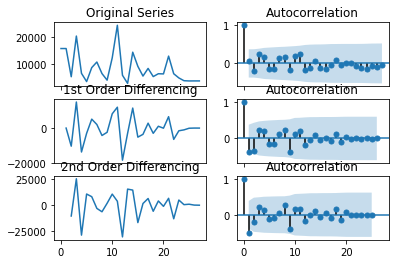

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(sexy_df.Trend); axes[0, 0].set_title('Original Series')
plot_acf(sexy_df.Trend, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(sexy_df.Trend.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(sexy_df.Trend.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(sexy_df.Trend.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(sexy_df.Trend.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

C:\Users\ARCHIT\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\ARCHIT\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\ARCHIT\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an a

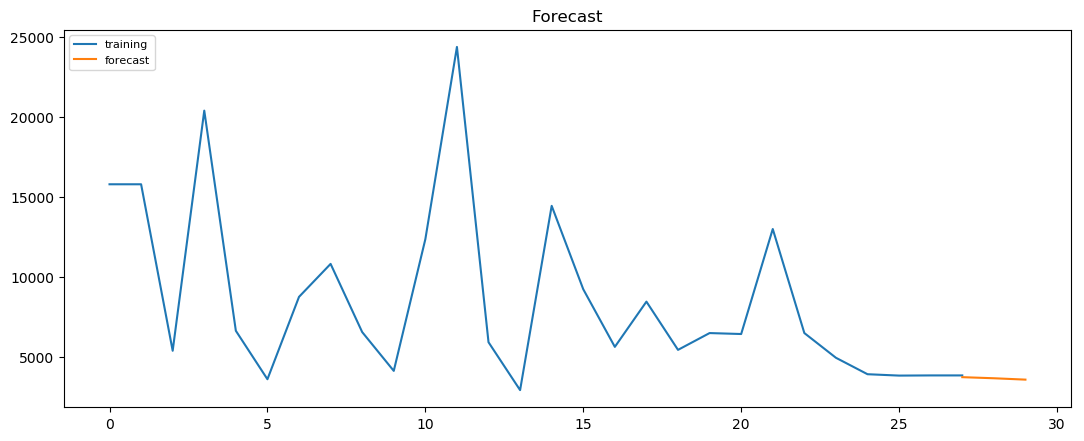

In [98]:
train = sexy_df.Trend

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(2, 2, 0))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(3, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, [27,28,29])

# Plot
plt.figure(figsize=(13,5), dpi=100)
plt.plot(train, label='training')
plt.plot(fc_series, label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [99]:
print(list(train), list(fc_series))

[15791.278605610123, 15791.278605610123, 5389.696837485389, 20391.810120732294, 6637.085449684295, 3609.8504768763187, 8756.54726476138, 10816.815108331473, 6556.799219131237, 4132.048337611292, 12359.79028948307, 24372.49072212358, 5922.558744419507, 2930.053924418457, 14443.071985437122, 9232.200917851684, 5632.284595032709, 8458.038292931527, 5445.146264487259, 6494.631986385748, 6435.256112579912, 12995.633864751855, 6495.77171980608, 4950.959404267909, 3923.4620673912045, 3837.5950314615325, 3848.3711244799892, 3848.3711244799892] [3739.2903810621106, 3671.2337642408734, 3585.4598851302717]


In [100]:
ele_df = df[df['style']=='Elegant']
ele_df = ele_df[['style', 'avg_rating', 'no_of_reviews', 'Date']]
ele_df.head()

,style,avg_rating,no_of_reviews,Date
1028,Elegant,4.9,2524,2017-10-18
445,Elegant,4.7,3258,2017-11-14
450,Elegant,4.8,5229,2017-11-23
1774,Elegant,4.9,8007,2017-11-29
1754,Elegant,5.0,0,2017-12-29


In [101]:
ele_df = ele_df[ele_df['Date']>='2018-0-0']

# Now we must cluster all dates month wise, i.e., All days from 2018-01-01 to 2018-01-31 must equal 2018-01
from math import ceil
def format_date(date):
    date = date.split('-')
    date[2] = '01'
    return '-'.join(date)
ele_df['Date'] = [format_date(date) for date in ele_df['Date']]

In [102]:
ele_df['Trend'] = ele_df.apply(lambda row: (int(row.avg_rating)**4)*((int(row.no_of_reviews)+1)**0.5), axis = 1)
ele_df.head()

,style,avg_rating,no_of_reviews,Date,Trend
1367,Elegant,4.8,588,2018-1-01,6212.946483
1740,Elegant,5.0,0,2018-10-01,625.000000
320,Elegant,4.8,951,2018-10-01,7898.751294
1831,Elegant,5.0,0,2018-10-01,625.000000
2186,Elegant,4.9,2564,2018-10-01,12965.332236


In [103]:
ele_df = ele_df.drop(columns = ['no_of_reviews', 'avg_rating'])
ele_df = (ele_df.groupby('Date', as_index=False)
        .agg({'Trend':'mean'}))

ele_df['Date'] =pd.to_datetime(ele_df.Date, format="%Y/%m/%d")
ele_df = ele_df.sort_values(by='Date')
ele_df.drop(ele_df.tail(3).index,inplace=True)
ele_df.set_index('Date', inplace=True)
idx = pd.date_range(start = '2018-01-01', end = '2020-04-01', freq = 'MS')
ele_df = ele_df.reindex(idx, fill_value='NaN')
ele_df = ele_df.astype(float)
ele_df = ele_df.interpolate(method='quadratic', axis=0).ffill().bfill()
ele_df = ele_df.reset_index()

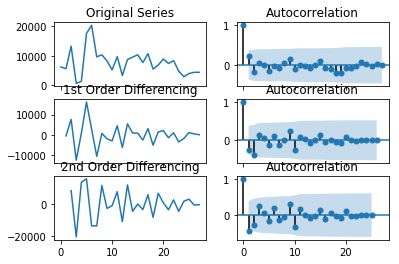

In [104]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(ele_df.Trend); axes[0, 0].set_title('Original Series')
plot_acf(ele_df.Trend, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(ele_df.Trend.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(ele_df.Trend.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(ele_df.Trend.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(ele_df.Trend.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

C:\Users\ARCHIT\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\ARCHIT\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\ARCHIT\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an a

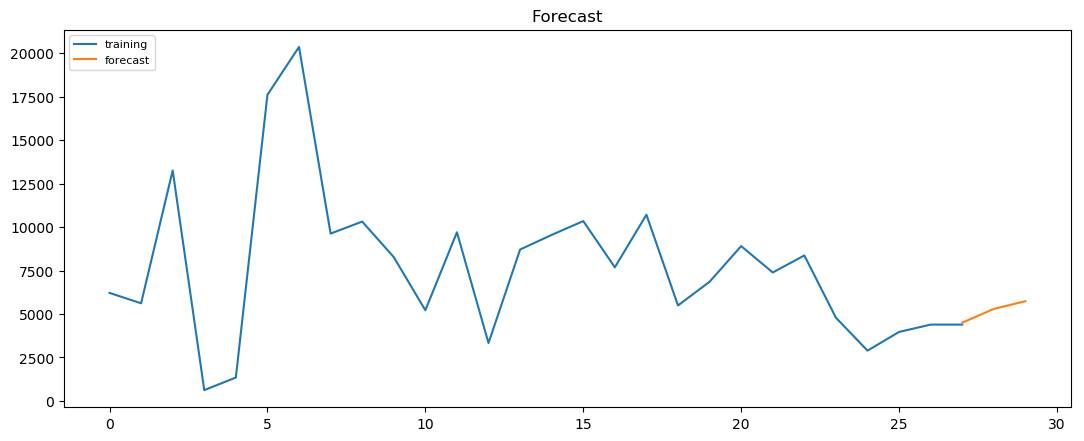

In [105]:
train = ele_df.Trend

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(3, 2, 0))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(3, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, [27,28,29])

# Plot
plt.figure(figsize=(13,5), dpi=100)
plt.plot(train, label='training')
plt.plot(fc_series, label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [106]:
print(list(train), list(fc_series))

[6212.9464829499375, 5615.84348621138, 13252.79140407786, 625.0, 1348.5531491067668, 17598.18292089348, 20349.987321863373, 9622.2826354288, 10312.676303348051, 8270.00667343262, 5215.070526132835, 9696.669257101197, 3330.751197838432, 8705.17025964369, 9546.71540729414, 10339.933729223585, 7682.965748750594, 10706.218801356417, 5490.470845959462, 6854.978535025483, 8902.51416569237, 7386.323464451692, 8365.536020062393, 4785.7371040236985, 2894.893165655255, 3969.3295197106277, 4390.766744561496, 4390.766744561496] [4502.747161325209, 5293.983745967493, 5736.348720457131]
